In [1]:
import pickle
from tqdm import tqdm
import pandas as pd
import json


import os 

os.chdir('c:/Users/Domen/IronHack/01_projects/IH_final_project_data-jobs')
print(os.getcwd())


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs


In [2]:

from src.myModules import my_NLP as myNLP

%load_ext autoreload
%autoreload 2

In [3]:
print(os.getcwd())
with open("config/config.json", 'r') as f:
    config = json.load(f)
    
NLP_data_path = config['NLP_data_path']

print(NLP_data_path)


nlp_df_input = 'NLP_title'
nlp_df_output_name = 'skills_df'

c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs
data/NLP_data/


## Test Code - NLP

load cleaned dataframe

In [4]:
with open(f"{NLP_data_path}{nlp_df_input}.pkl", "rb") as file:
    df = pickle.load(file)


In [5]:
df.head(2)

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,job_level,keyword,language,new_job_title,posting_date,scraping_date,seniority_level,title,url
0,"Aschheim, Bavaria, Germany",Atruvia AG,software_engineer fullstack,software engineer fullstack,Full-time,True,3685669741,IT Services and IT Consulting,VollzeitWir sind der Digitalisierungspartner d...,Engineering and Information Technology,NaN,data_engineer,de,[software_engineer],4 days ago,2023-09-26,Entry level,Software Engineer Fullstack (m/w/d),https://www.linkedin.com/jobs/search?keywords=...
1,"Berlin, Berlin, Germany",Almedia,data_analyst bi_analyst,data analyst business intelligence,Full-time,True,3719620327,"Technology, Information and Internet",Almedia helps companies grow by promoting thei...,Analyst,NaN,Data Analyst,en,"[data_analyst, bi_analyst]",1 week ago,2023-09-26,Mid-Senior level,Data Analyst - Business Intelligence,https://www.linkedin.com/jobs/search?keywords=...


In [6]:
bert_df = df[df['first_match']==True]

In [7]:
print(df.columns)
nlp_df = df[df['first_match']==True]

# nlp_df = nlp_df[[ 'id', 'company', 'title','new_job_title', 'job_description',  'language', 'url']]

Index(['city', 'company', 'cp1_title', 'cp2_title', 'employment_type',
       'first_match', 'id', 'industries', 'job_description', 'job_function',
       'job_level', 'keyword', 'language', 'new_job_title', 'posting_date',
       'scraping_date', 'seniority_level', 'title', 'url'],
      dtype='object')


In [8]:
keywords = ['data_analyst', 'analytics_engineer','bi_analyst', 'ml_engineer', 'business_analyst', 'business_intelligence_analyst', 'data_scientist']

In [9]:
nlp_df = nlp_df[nlp_df['new_job_title'].apply(lambda job_title: any(skill in keywords for skill in job_title))]

In [10]:
nlp_df.fillna("", inplace=True)

#### Language detection

In [11]:
tricky_re_skills = ['r', 'scala', 'sas', 'gcp']

In [12]:
skills = ['python', 'sql', 'gitlab',' r ','bi-bool','r shiny', 'power bi', 'visual analytics' 'cognos bi','aws', 'spark', 'azure', 'tableau', 'java', 'excel', 'hadoop', 'scala', 
           'snowflake', 'kafka', 'nosql', 'databricks', ' git ', 'redshift', 'airflow', 'oracle', 'sap', 'ad-hoc', 
           'sql server', 'docker', 'kubernetes', 'power_bi', 'c++', 'numpy', 'dplyr', 'matplotlib', 
           'seaborn', 'ggplot', 'hypothesis testing', 'regression analysis', 'predictive analysis', 'bayesian statistics', 
           'scikit', 'tensorflow', 'pytorch', 'xgboost', 'deep learning', 'hadoop', 'bigquery', 'airflow', 'nltk', 'spacy', 
           'nlp', 'aws', 'azure', 'looker', 'ms-office', ' ml ', ' nlp ', ' pandas', 'e2e', ' sas ', ' gcp ']

First round of skill extraction from text

In [13]:
tqdm.pandas(desc="Processing")
nlp_df['nlp_job_description'] = nlp_df['job_description'].progress_apply(lambda x: x.lower().strip()) # lower job description text
nlp_df = nlp_df.progress_apply(lambda row: myNLP.check_skills(row, skills), axis=1) # use check_skill function to extract skills from text which matches words in skills list


Processing: 100%|██████████| 1687/1687 [00:04<00:00, 363.88it/s]


In [14]:
display(nlp_df.loc[nlp_df["city"]==38])

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,keyword,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url


In [18]:
nlp_df = myNLP.prepare_dataset(nlp_df)

In [19]:
with open(f"{NLP_data_path}{nlp_df_output_name}.pkl", "wb") as file:
    pickle.dump(nlp_df, file)

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,keyword,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url
1,"Berlin, Berlin, Germany",Almedia,data_analyst bi_analyst,data analyst business intelligence,Full-time,True,3719620327,"Technology, Information and Internet",Almedia helps companies grow by promoting thei...,Analyst,...,Data Analyst,en,"[data_analyst, bi_analyst]",almedia helps companies grow by promoting thei...,1 week ago,2023-09-26,Mid-Senior level,"[SQL, SQL, Python, Excel]",Data Analyst - Business Intelligence,https://www.linkedin.com/jobs/search?keywords=...
3,"Berlin, Berlin, Germany",Ultramarin,financial data_analyst,financial data analyst,Full-time,True,3672508925,Financial Services,About The PositionWe are looking for a top-tie...,Information Technology,...,Data Analyst,en,[data_analyst],about the positionwe are looking for a top-tie...,2 months ago,2023-09-24,Mid-Senior level,"[Excel, SQL, Python, Pandas, Matplotlib]",Financial Data Analyst (m/f/d),https://www.linkedin.com/jobs/search?keywords=...


Investigate german and english text to identify further skills to extract 

In [36]:
filtered_view = nlp_df[nlp_df['new_job_title'].apply(lambda job_title: any(skill in ['data_analyst'] for skill in job_title))] # filter dataset on specific job title
filtered_view.head(20)

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,keyword,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url
1,"Berlin, Berlin, Germany",Almedia,data_analyst bi_analyst,data analyst business intelligence,Full-time,True,3719620327,"Technology, Information and Internet",Almedia helps companies grow by promoting thei...,Analyst,...,Data Analyst,en,"[data_analyst, bi_analyst]",almedia helps companies grow by promoting thei...,1 week ago,2023-09-26,Mid-Senior level,"[SQL, SQL, Python, Excel]",Data Analyst - Business Intelligence,https://www.linkedin.com/jobs/search?keywords=...
3,"Berlin, Berlin, Germany",Ultramarin,financial data_analyst,financial data analyst,Full-time,True,3672508925,Financial Services,About The PositionWe are looking for a top-tie...,Information Technology,...,Data Analyst,en,[data_analyst],about the positionwe are looking for a top-tie...,2 months ago,2023-09-24,Mid-Senior level,"[Excel, SQL, Python, Pandas, Matplotlib]",Financial Data Analyst (m/f/d),https://www.linkedin.com/jobs/search?keywords=...
5,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585738180,Staffing and Recruiting,Orange Quarter are working with an exciting st...,Information Technology,...,Data Analyst,en,[data_analyst],orange quarter are working with an exciting st...,5 months ago,2023-09-24,Entry level,[E2E],Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
6,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734564,Staffing and Recruiting,Orange Quarter are currently looking for a Dat...,Information Technology,...,Data Analyst,en,[data_analyst],orange quarter are currently looking for a dat...,5 months ago,2023-09-24,Entry level,"[SQL, Python, Snowflake, BigQuery]",Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
8,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734595,Staffing and Recruiting,We are currently working with an emerging SaaS...,Information Technology,...,Data Analyst,en,[data_analyst],we are currently working with an emerging saas...,5 months ago,2023-09-24,Entry level,"[E2E, SQL, Python, R ]",Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
10,"Berlin, Berlin, Germany",kevin.,product data_analyst,product data analyst,Full-time,True,3687813018,Financial Services,kevin. is different. While everyone was talkin...,Information Technology,...,Data Analyst,en,[data_analyst],kevin. is different. while everyone was talkin...,1 month ago,2023-09-24,Mid-Senior level,"[SQL, Tableau, Power BI, Looker, SAP]",Product Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
14,"Berlin, Berlin, Germany",CBTW,data_analyst,data analyst,Full-time,True,3706371923,IT Services and IT Consulting,Positive Thinking Company ist Teil unseres wel...,Consulting,...,Data Analyst,de,[data_analyst],positive thinking company ist teil unseres wel...,3 weeks ago,2023-09-26,Entry level,"[Tableau, Power BI, R ]",Data Analyst (m/w/d),https://www.linkedin.com/jobs/search?keywords=...
17,"Berlin, Berlin, Germany",Qualitas Energy Deutschland GmbH,data_analyst,data analyst,Full-time,True,3701510210,Financial Services,Powering Change.Seit mehr als 16 Jahren setzen...,Information Technology,...,Data Analyst,de,[data_analyst],powering change.seit mehr als 16 jahren setzen...,4 weeks ago,2023-09-24,Entry level,[Python],Data Analyst (w/m/d),https://www.linkedin.com/jobs/search?keywords=...
18,"Berlin, Berlin, Germany",Talentschmiede Unternehmensberatung AG,young professional client data_analyst ←,client data analyst ←,Full-time,True,3582381366,IT Services and IT Consulting,"As a cross-industry IT management consultancy,...",Information Technology,...,Data Analyst,en,[data_analyst],"as a cross-industry it management consultancy,...",5 months ago,2023-09-24,Entry level,"[excel, Oracle, SQL]",Young Professional C

In [37]:
df_ger = nlp_df[nlp_df['language'] == 'de']
df_eng = nlp_df[nlp_df['language'] == 'en']

In [38]:
df_ger.head(10)

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,keyword,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url
14,"Berlin, Berlin, Germany",CBTW,data_analyst,data analyst,Full-time,True,3706371923,IT Services and IT Consulting,Positive Thinking Company ist Teil unseres wel...,Consulting,...,Data Analyst,de,[data_analyst],positive thinking company ist teil unseres wel...,3 weeks ago,2023-09-26,Entry level,"[Tableau, Power BI, R ]",Data Analyst (m/w/d),https://www.linkedin.com/jobs/search?keywords=...
17,"Berlin, Berlin, Germany",Qualitas Energy Deutschland GmbH,data_analyst,data analyst,Full-time,True,3701510210,Financial Services,Powering Change.Seit mehr als 16 Jahren setzen...,Information Technology,...,Data Analyst,de,[data_analyst],powering change.seit mehr als 16 jahren setzen...,4 weeks ago,2023-09-24,Entry level,[Python],Data Analyst (w/m/d),https://www.linkedin.com/jobs/search?keywords=...
22,"Berlin, Berlin, Germany",Qcells Europe,data_analyst system developer,data analyst system developer,Full-time,True,3720128757,Renewable Energy Semiconductor Manufacturing,Setzt neue Energie frei - Dein Einsatz:Sie int...,Information Technology,...,Data Analyst,de,[data_analyst],setzt neue energie frei - dein einsatz:sie int...,1 week ago,2023-09-26,Entry level,"[Python, SQL]",Data Analyst / System Developer (m/f/d),https://www.linkedin.com/jobs/search?keywords=...
26,"Berlin, Berlin, Germany",Michael Page,data_analyst klimadaten,data analyst klimadaten,Full-time,True,3713068792,"IT Services and IT Consulting, Telecommunicati...",Pionier in Grüner Energie|Internationales Unte...,Information Technology,...,Data Analyst,de,[data_analyst],pionier in grüner energie|internationales unte...,1 month ago,2023-09-24,Associate,"[SQL, Python]",Data Analyst (m/w/d) Klimadaten,https://www.linkedin.com/jobs/search?keywords=...
28,"Berlin, Berlin, Germany",Lloyds Bank GmbH,data_analyst im marketing-bereich,data analyst im marketing-bereich,Full-time,True,3710653394,Banking,Über eine Million zufriedene Kund*innen konnte...,Information Technology,...,Data Analyst,de,[data_analyst],über eine million zufriedene kund*innen konnte...,3 weeks ago,2023-09-26,Entry level,"[Ad-hoc, Power BI, SQL]",Data Analyst im Marketing-Bereich (m/w/d),https://www.linkedin.com/jobs/search?keywords=...
31,"Kleinmachnow, Brandenburg, Germany",energicos GmbH,data_scientist data_analyst,data scientist data analyst,Full-time,True,3694113016,"Renewable Energy Semiconductor Manufacturing, ...",BerlinVollzeitab sofortAusschreibung Data Scie...,"Engineering, Information Technology, and Proje...",...,Data Analyst,de,"[data_scientist, data_analyst]",berlinvollzeitab sofortausschreibung data scie...,1 month ago,2023-09-24,Entry level,"[Python, Python]",Data Scientist / Data Analyst (m/w/d),https://www.linkedin.com/jobs/search?keywords=...
34,"Berlin, Berlin, Germany",BWI GmbH,data_analyst controlling_ ler bi_analyst,data analyst controller business intelligence,Full-time,True,3711964211,IT Services and IT Consulting,Sorgen Sie gemeinsam mit uns für die digitale ...,Information Technology,...,Data Analyst,de,"[data_analyst, controlling_, bi_analyst]",sorgen sie gemeinsam mit uns für die digitale ...,3 weeks ago,2023-09-26,Mid-Senior level,NaN,Data Analyst / Controller Business Intelligenc...,https://www.linkedin.com/jobs/search?keywords=...
35,"Berlin, Berlin, Germany",SCI Verkehr GmbH,business_analyst data_analyst logistik ...,business analyst data analyst logistik für ...,Full-time,True,3704824751,Business Consulting and Services,Analystin im Mobilitätssektor (w/m/d) für die ...,"Administrative, Management, and General Business",...,Data Analyst,de,"[business_analyst, data_analyst]",analystin im mobilitätssektor (w/m/d) für die ...,3 weeks ago,2023-09-26,Mid-Senior level,[Excel],Business Analyst / Data Analyst Logistik (w/m/...,https://www.linkedin.com/jobs/search?keywords=

In [39]:
# df_ger = df_ger.progress_apply(lambda row: myNLP.check_german_style(row), axis=1)
# df_ger.head(2)

In [40]:
df_ger['nlp_job_description'] = df_ger['nlp_job_description'].progress_apply(myNLP.clean_up)
df_ger['nlp_job_description'] = df_ger['nlp_job_description'].progress_apply(myNLP.stem_and_lemmatize_german) # lemmatize strings
df_ger['nlp_job_description'] = df_ger['nlp_job_description'].progress_apply(myNLP.tokenize) # tokenize
df_ger['nlp_job_description'] = df_ger['nlp_job_description'].progress_apply(myNLP.remove_stopwords_german) #remove stopwords from
df_ger['nlp_job_description'] = df_ger['nlp_job_description'].progress_apply(myNLP.re_blob) # reblob
df_ger['nlp_job_description'] = df_ger['nlp_job_description'].progress_apply(lambda x: x.lower().strip())


Processing: 100%|██████████| 1350/1350 [00:00<00:00, 6328.10it/s]
C:\Users\Domen\AppData\Local\Temp\ipykernel_38464\1913035804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ger['nlp_job_description'] = df_ger['nlp_job_description'].progress_apply(myNLP.clean_up)
Processing: 100%|██████████| 1350/1350 [01:10<00:00, 19.19it/s]
C:\Users\Domen\AppData\Local\Temp\ipykernel_38464\1913035804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ger['nlp_job_description'] = df_ger['nlp_job_description'].p

In [41]:
df_ger['nlp_job_description'].head(10)

14    positiv thinking company teil weltweit ökosyst...
17    powering change -- seit mehr 16 jahr setzen er...
22    setzen neu energie frei -- einsatz -- interagi...
26    pionier grün energie|internationales unternehm...
28    million zufrieden kund * inne lloyds bank gmbh...
31    berlinvollzeitab sofortausschreibung data scie...
34    sorgen gemeinsam digital zukunftsfähigkeit lan...
35    analystin mobilitätssektor strategisch beratun...
38    power bi -- sql azure alltag|bundesweiter digi...
39    talentschmiede fördern branchenübergreifend it...
Name: nlp_job_description, dtype: object

In [42]:
# !pip install wordcloud

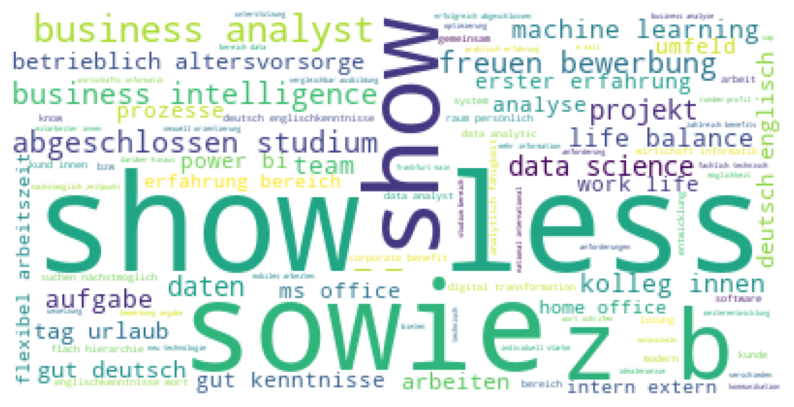

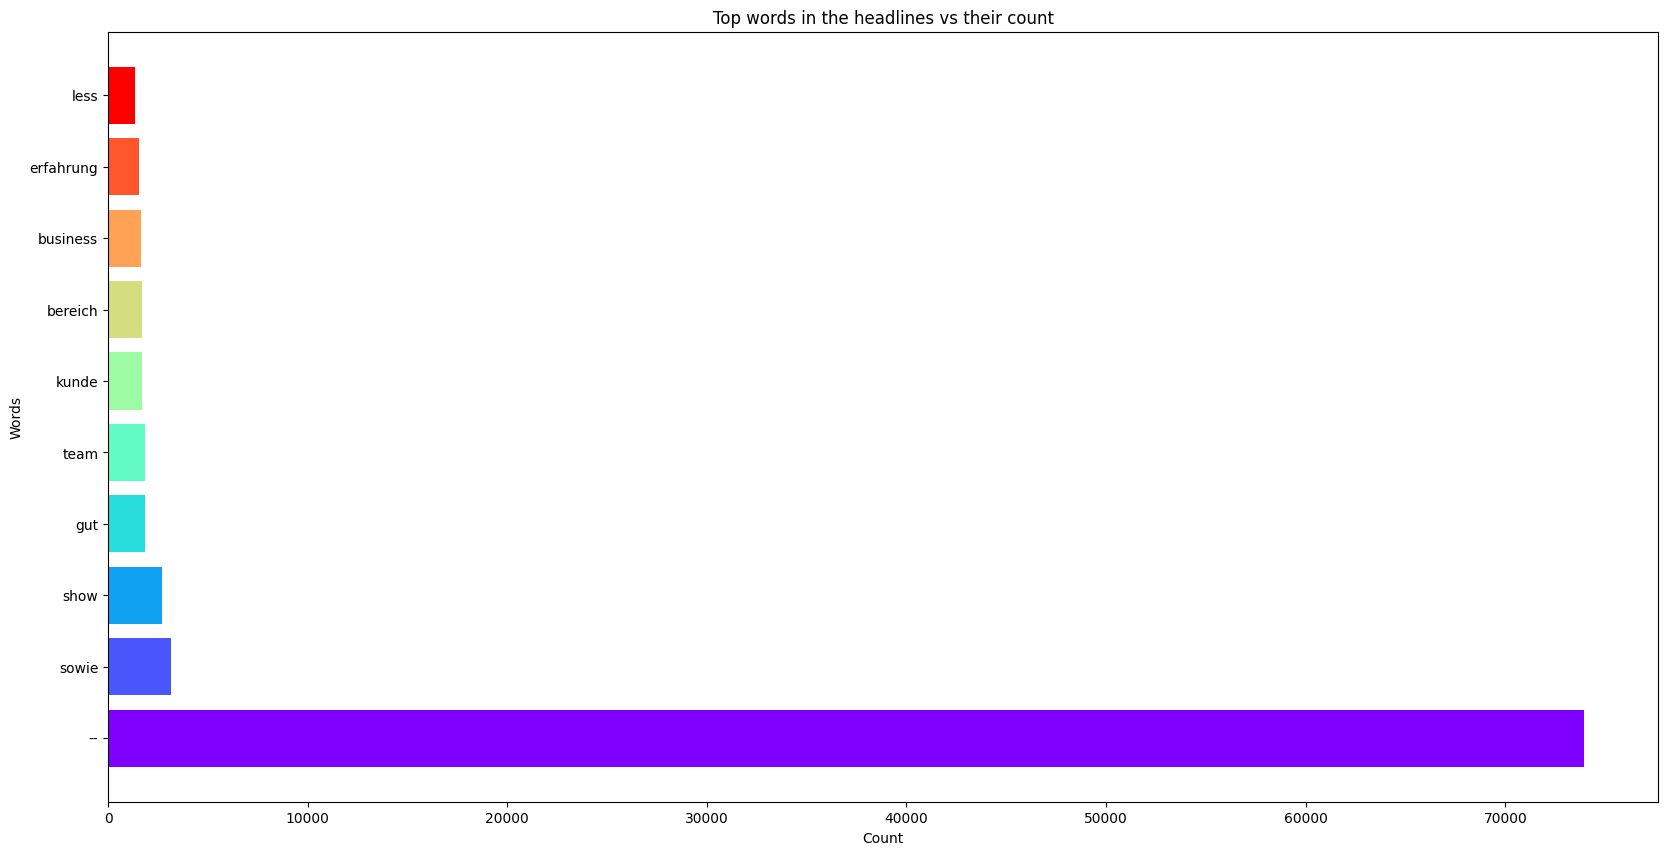

In [43]:
myNLP.word_cloud(df_ger, 'nlp_job_description')

english dataset

In [44]:
df_eng['nlp_job_description'] = df_eng['nlp_job_description'].progress_apply(myNLP.clean_up) # clean dataset
df_eng['nlp_job_description'] = df_eng['nlp_job_description'].progress_apply(myNLP.stem_and_lemmatize_german) # lemmatize strings
df_eng['nlp_job_description'] = df_eng['nlp_job_description'].progress_apply(myNLP.tokenize) # tokenize
df_eng['nlp_job_description'] = df_eng['nlp_job_description'].progress_apply(myNLP.remove_stopwords_german) #remove stopwords from
df_eng['nlp_job_description'] = df_eng['nlp_job_description'].progress_apply(myNLP.re_blob) # reblob
df_eng['nlp_job_description'] = df_eng['nlp_job_description'].progress_apply(lambda x: x.lower().strip())

Processing: 100%|██████████| 336/336 [00:00<00:00, 6071.71it/s]
C:\Users\Domen\AppData\Local\Temp\ipykernel_38464\261711839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['nlp_job_description'] = df_eng['nlp_job_description'].progress_apply(myNLP.clean_up) # clean dataset
Processing: 100%|██████████| 336/336 [00:22<00:00, 14.85it/s]
C:\Users\Domen\AppData\Local\Temp\ipykernel_38464\261711839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['nlp_job_description'] = df_eng['nlp_job_descr

In [45]:
display(df_eng['nlp_job_description'].head(10))

1     almedia helps companies grow by promoting thei...
3     about the positionwe are looking for a top-tie...
4     your missiona a business intelligence analyst ...
5     orange quarter are working with exciting start...
6     orang quarter are currently looking for a data...
7     build -- future with enter -- our mission -- t...
8     we are currently working with emerging saas bu...
10    kevin -- -- different -- whilen everyone talki...
18    as a cross-industry -- management consultancy ...
20    your missiona a crucial part -- -- business pr...
Name: nlp_job_description, dtype: object

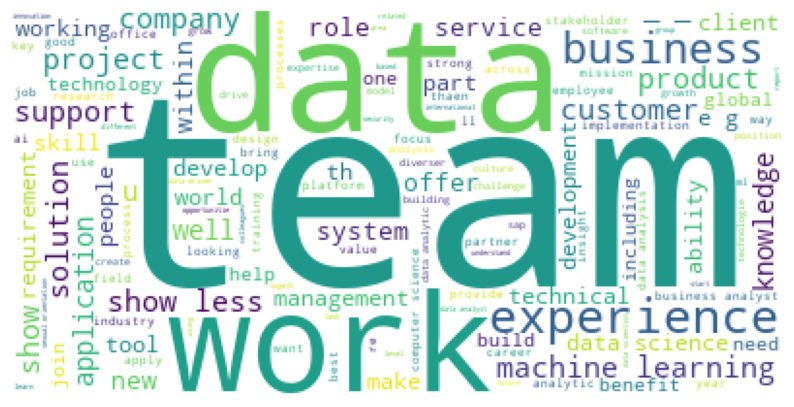

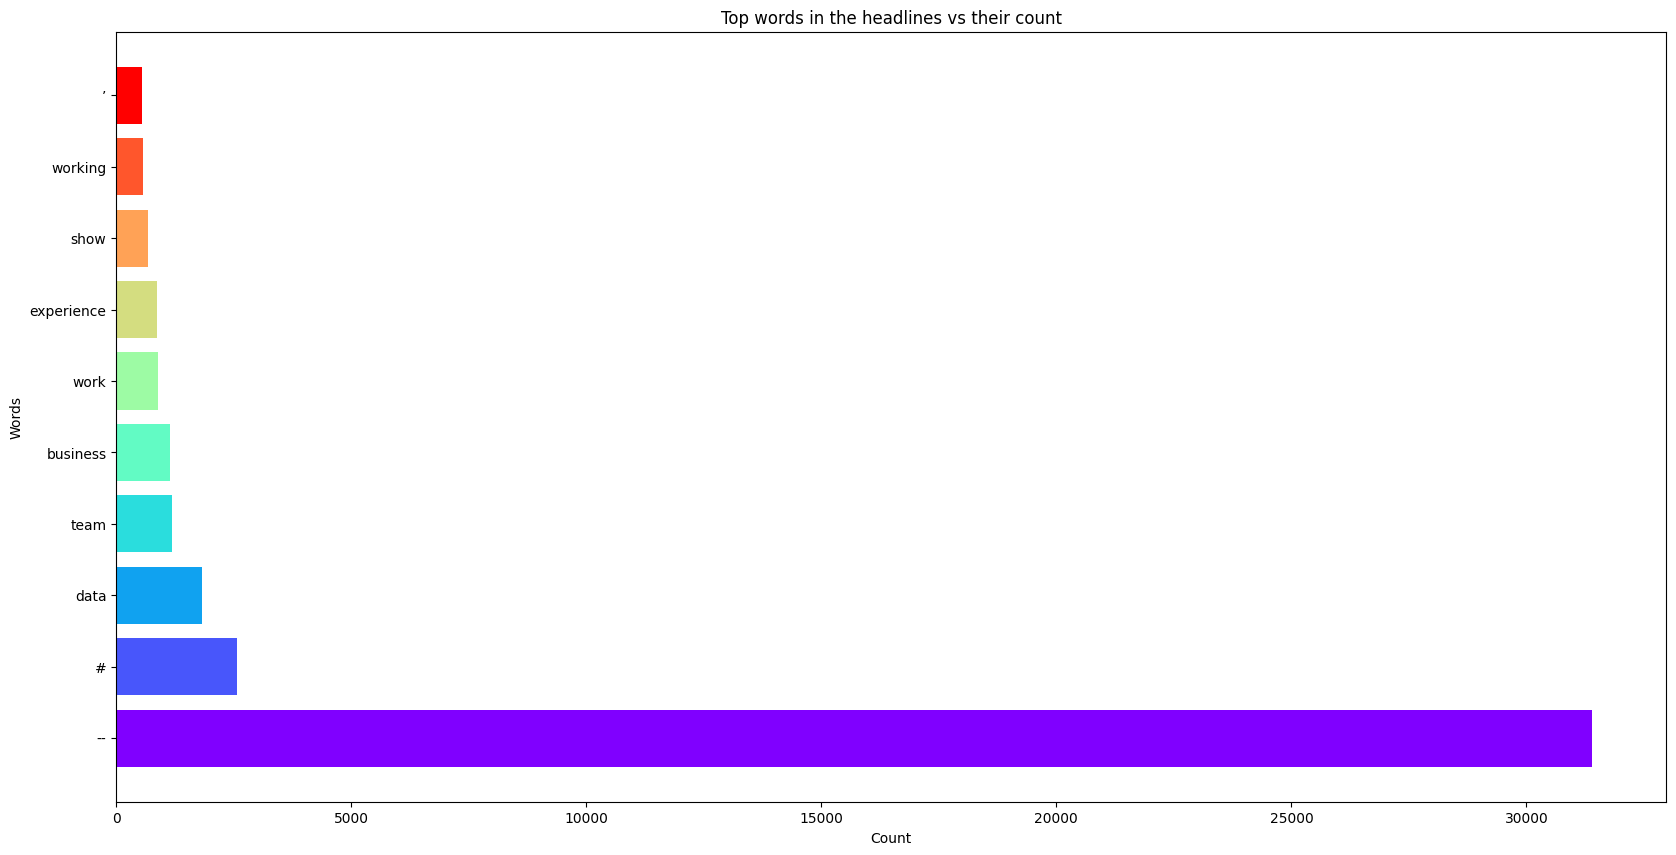

In [46]:
myNLP.word_cloud(df_eng, 'nlp_job_description')

### clustering using BERT Model and KMEAN 

In [47]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

In [49]:
# def encode_text(text):
#     inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
#     outputs = model(**inputs)
#     embeddings = outputs.last_hidden_state[:,0,:].detach().numpy()
#     return embeddings

In [50]:
# embeddings = np.array([encode_text(text) for text in tqdm(bert_df['job_description'])]).squeeze()


# try:
#     with open("data/model_data/bert_embedding.pkl", "wb") as file:
#         pickle.dump(embeddings, file)
# except Exception as e:
#     print(f"Error: {e}")

In [51]:
try:
    with open("data/model_data/bert_embedding.pkl", "wb") as file:
        pickle.dump(embeddings, file)
except Exception as e:
    print(f"Error: {e}")

Error: name 'embeddings' is not defined


In [52]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [53]:
try:
    with open("data/model_data/bert_embedding.pkl", "rb") as file:
        embeddings = pickle.load(file)
except Exception as e:
    print(f"Error: {e}")

Error: Ran out of input


In [54]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Initialize variables
silhouette_scores = []
inertia = []
# Loop through different numbers of clusters
for i in range(2, 35):  # Start from 2 as silhouette_score needs at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(embeddings)
    cluster_labels = kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    
    # Calculate the silhouette score and append to the list
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    # print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg}")


NameError: name 'embeddings' is not defined

In [ ]:
# Plotting the silhouette scores
plt.plot(range(2, 35), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



plt.plot(range(10, 35), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
!pip uninstall matplotlib

^C
